In [34]:
import requests
import datetime 
from bs4 import BeautifulSoup as soup
import numpy as np
import matplotlib.pyplot as plt
from time import sleep
%matplotlib inline

In [29]:
def setPage(URL):
    response = requests.get(URL)
    if response.status_code == 200:
        return soup(response.text)
    raise Exception(f"response code = {response.status_code}")

In [3]:
def strip_junk(line):
    date_to_format, *content = line.lstrip("average180.push([new Date('").replace("')", "").replace("]);", '').split(", ")
    date = datetime.date.fromisoformat(date_to_format.replace("/", "-")).strftime("%Y:%m:%d")
    day, avg = list(map(int, content))
    return [date, day, avg] 

In [4]:
def get_points(page):
    dane_zasmiecone = page.body.find("script").text.split("\n\t\t\t\t\t\n                \t")
    dane_z_6_miesiecy = [line for line in dane_zasmiecone if line.startswith("average180")]
    dane_do_wykresu = [strip_junk(line) for line in dane_z_6_miesiecy]
    return dane_do_wykresu

In [32]:
def get_categories(page):
    all_categories = page.find("div", {"class": "categories"}).find_all("li")
    names_and_categories = [{"name": el.text, "link": el.a["href"]} for el in all_categories]
    return names_and_categories

In [63]:
def get_all_items_on_page(page):
    return page.find("div", {"class": "content"}).table.tbody.find_all("tr")

def get_item_name(obj):
    return obj.td.span.text

def get_item_link(obj):
    return obj.td.a["href"]

In [26]:
link = "https://secure.runescape.com/m=itemdb_rs/Crustacea+armour+token/viewitem?obj=50401"
link2 = 'https://secure.runescape.com/m=itemdb_rs/catalogue'
link_base_categories = "https://secure.runescape.com/m=itemdb_rs/{}"

In [9]:
page_soup = setPage(link2)

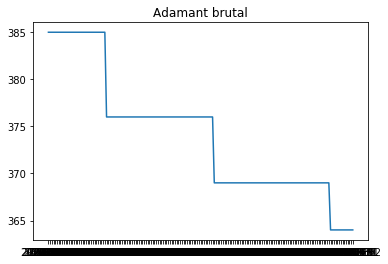

Adamant brutal https://secure.runescape.com/m=itemdb_rs/Adamant+brutal/viewitem?obj=4798


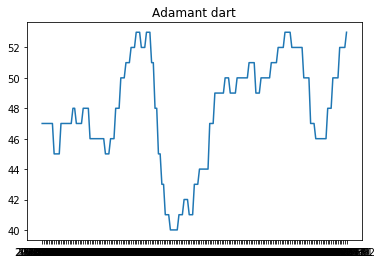

Adamant dart https://secure.runescape.com/m=itemdb_rs/Adamant+dart/viewitem?obj=810


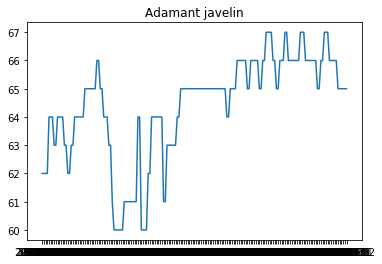

Adamant javelin https://secure.runescape.com/m=itemdb_rs/Adamant+javelin/viewitem?obj=829


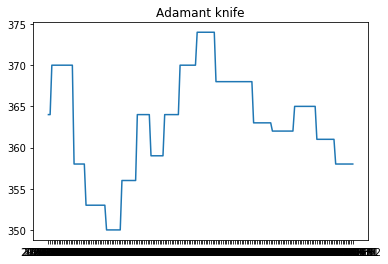

Adamant knife https://secure.runescape.com/m=itemdb_rs/Adamant+knife/viewitem?obj=867


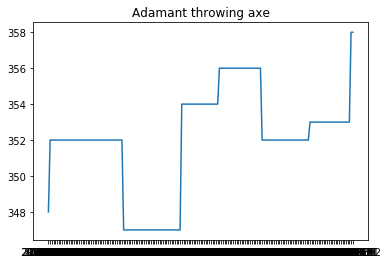

Adamant throwing axe https://secure.runescape.com/m=itemdb_rs/Adamant+throwing+axe/viewitem?obj=804


In [61]:
categories = get_categories(page_soup)
for cat in categories:
    link_temp = link_base_categories.format(cat["link"])
    page_temp = setPage(link_temp)
    items = get_all_items_on_page(page_temp)
    for item in items[:5]:
        item_name = get_item_name(item)
        item_link = get_item_link(item)
        item_page = setPage(item_link)
        item_points = get_points(item_page)
        Dates, Values, Average = list(zip(*item_points))
        plt.plot(Dates, Values)
        plt.title(item_name)
        plt.show()
        sleep(1)
    sleep(1)
    break

In [58]:
get_points(page_item_temp)

[['2020:03:08', 385, 385],
 ['2020:03:09', 385, 385],
 ['2020:03:10', 385, 385],
 ['2020:03:11', 385, 385],
 ['2020:03:12', 385, 385],
 ['2020:03:13', 385, 385],
 ['2020:03:14', 385, 385],
 ['2020:03:15', 385, 385],
 ['2020:03:16', 385, 385],
 ['2020:03:17', 385, 385],
 ['2020:03:18', 385, 385],
 ['2020:03:19', 385, 385],
 ['2020:03:20', 385, 385],
 ['2020:03:21', 385, 385],
 ['2020:03:22', 385, 385],
 ['2020:03:23', 385, 385],
 ['2020:03:24', 385, 385],
 ['2020:03:25', 385, 385],
 ['2020:03:26', 385, 385],
 ['2020:03:27', 385, 385],
 ['2020:03:28', 385, 385],
 ['2020:03:29', 385, 385],
 ['2020:03:30', 385, 385],
 ['2020:03:31', 385, 385],
 ['2020:04:01', 385, 385],
 ['2020:04:02', 385, 385],
 ['2020:04:03', 385, 385],
 ['2020:04:04', 385, 385],
 ['2020:04:05', 385, 385],
 ['2020:04:06', 385, 385],
 ['2020:04:07', 385, 385],
 ['2020:04:08', 385, 385],
 ['2020:04:09', 385, 385],
 ['2020:04:10', 385, 385],
 ['2020:04:11', 376, 384],
 ['2020:04:12', 376, 384],
 ['2020:04:13', 376, 384],
 

In [86]:
points = get_points(page_soup)

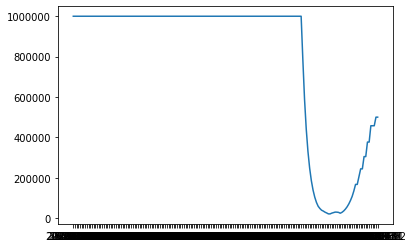

In [93]:
Dates, Values, Average = list(zip(*points))
plt.plot(Dates, Values)

In [94]:
# import matplotlib.pyplot as plt

# x = np.linspace(0, 10, 500)
# y = np.sin(x)

# fig, ax = plt.subplots()

# line1, = ax.plot(x, y, label='Using set_dashes()')
# line1.set_dashes([2, 2, 10, 2]) 

# line2, = ax.plot(x, y - 0.2, dashes=[6, 2], label='Using the dashes parameter')

# ax.legend()
# plt.show()

In [14]:
# from selenium import webdriver

# # path = r'C:\Users\Urszula\Desktop\wojtek\Python\geckodriver'
# browser = webdriver.Chrome()

# browser.get(link)

# var = browser.find_element_by_tag_name("svg").find_element_by_tag_name("g").find_element_by_tag_name("g").find_element_by_tag_name("g")

# chart_height = var.find_element_by_tag_name("rect").get_attribute("y")

# chart_height = int(chart_height) - 3

# 395/377

# chart = browser.find_elements_by_tag_name("circle")

# punkty = []
# for i, punkt in enumerate(chart):
# #     CX = punkt.get_attribute("cx")
#     CY = punkt.get_attribute("cy")
#     height = chart_height - float(CY)
#     punkty.append((i, height))
    
# punkty = punkty[::-1]
# punkty
# browser.close()